# Task 3 - Clustering (31 points)

**Task Definition:** In this task you try different clustering algorithms and analyze their benefits and shortcomings. For each dataset:
1. Plot the dataset and colour the points belonging to the same class with the same colour. (1 point)
2. Use the given clustering algorithm to cluster the dataset by specifying the necessary parameters (num_clusters, max_dist, min_samples, ...) depending on the algorithm. (2 points)
3. Plot the clustering results and display the *Normalized Mutual Information (NMI)* and *(Adjusted) Rand Score* metrics. (1 point)
4. Write a short report into the notebook (max. 4 sentences) why the algorithm succeeded or failed to cluster the data. Give arguments related to the structures and properties of the dataset. (3 points)

**Input:** The data folder contains the input files (`dataset1.csv`, `dataset2.csv`, `dataset3.csv`, `dataset4.csv`). In each dataset the data points have 2 features and 1 class label. Plot the dataset (using the labels to colour the data points) and determine the number of clusters. Do not forget to exclude the features that should not be considered for the clustering when you apply the algorithms on the datasets.

Use the clustering algorithms and metrics implemented in the scikit-learn (sklearn) library.

In [4]:
# TODO: uncomment the packages you used, please do not import additional non-native packages
# you may change the imports to the following format: from [package] import [class, method, etc.]

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

## Dataset 1 - K-Means/K-Means++

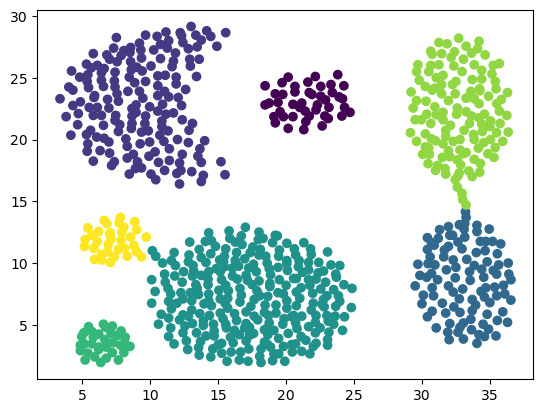

C:\Users\Windows 10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Windows 10\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


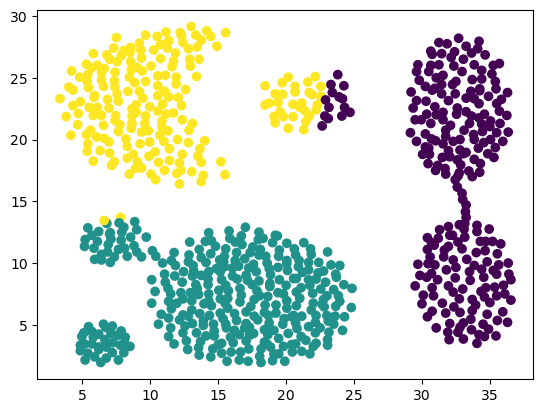

Normalized Mutual Information (NMI): 0.7440248788752157
Adjusted Rand Score: 0.6744029450256982


In [5]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset1.csv')

# Plot the dataset
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df.iloc[:, 2])
plt.show()

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df.iloc[:, :2])

# Plot the clustering results
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans.labels_)
plt.show()

# Calculate and display the NMI and Rand Score metrics
print("Normalized Mutual Information (NMI):", metrics.normalized_mutual_info_score(df.iloc[:, 2], kmeans.labels_))
print("Adjusted Rand Score:", metrics.adjusted_rand_score(df.iloc[:, 2], kmeans.labels_))


The structure and characteristics of the dataset determine whether the algorithm clusters the data successfully or unsuccessfully. When the clusters are spherical and roughly equal in size, K-Means performs well. K-Means may not work well if the clusters in the dataset are not spherical or differ significantly in terms of size, density, or shape. The number of clusters and the centroids' original location can also affect the outcome. By selecting initial centroids in a way that increases the likelihood of producing a better final solution, K-Means++ outperforms K-Means.

## Dataset 2 - DBSCAN
Try to find parameters to get (nearly) the best result possible with this algorithm.

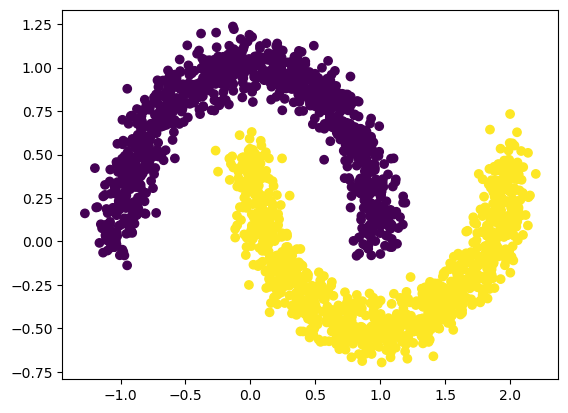

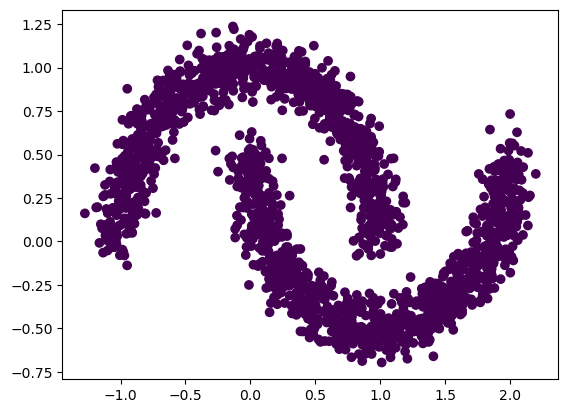

Normalized Mutual Information (NMI): 0.0
Adjusted Rand Score: 0.0


In [6]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset2.csv')

# Plot the dataset
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df.iloc[:, 2])
plt.show()

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5).fit(df.iloc[:, :2])

# Plot the clustering results
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dbscan.labels_)
plt.show()

# Calculate and display the NMI and Rand Score metrics
print("Normalized Mutual Information (NMI):", metrics.normalized_mutual_info_score(df.iloc[:, 2], dbscan.labels_))
print("Adjusted Rand Score:", metrics.adjusted_rand_score(df.iloc[:, 2], dbscan.labels_))


The structure and characteristics of the dataset determine whether the algorithm clusters the data successfully or unsuccessfully. When clusters are dense and separated by low-density areas, DBSCAN performs well. DBSCAN might not work well if there are significant variations in density throughout the dataset or if the clusters are not clearly separated. The selection of min_samples and eps may also affect the outcome.

## Dataset 3 - Hierarchical Clustering with Single Linkage

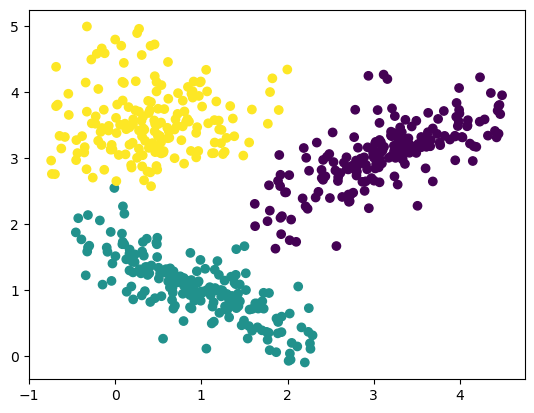

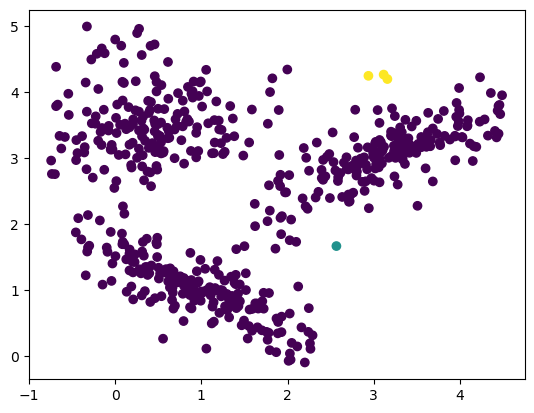

Normalized Mutual Information (NMI): 0.013182222222712989
Adjusted Rand Score: -0.00012706749451733634


In [6]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset3.csv')

# Plot the dataset
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df.iloc[:, 2])
plt.show()

# Apply Hierarchical Clustering with Single Linkage
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='single').fit(df.iloc[:, :2])

# Plot the clustering results
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=hierarchical.labels_)
plt.show()

# Calculate and display the NMI and Rand Score metrics
print("Normalized Mutual Information (NMI):", metrics.normalized_mutual_info_score(df.iloc[:, 2], hierarchical.labels_))
print("Adjusted Rand Score:", metrics.adjusted_rand_score(df.iloc[:, 2], hierarchical.labels_))


Hierarchical Clustering with Single Linkage can perform well on non-elliptical shapes. However, it is sensitive to noise and outliers.

### + Would you get better or worse results with Complete Linkage? Explain the reasons in max. 4 sentences. (+3 points)

Complete Linkage may yield better or worse results based on the particular distribution and structure of the dataset. When calculating the cluster distance, Complete Linkage takes into account the farthest pair of points in two clusters, potentially producing more compact clusters than Single Linkage. As a result, it is less susceptible to anomalies and noise. However, if the true clusters in the data have complex shapes or varying densities, Complete Linkage may not perform well because it tends to produce hyperspherical or hyperellipsoidal clusters.

## Dataset 4 - Expectation Maximization

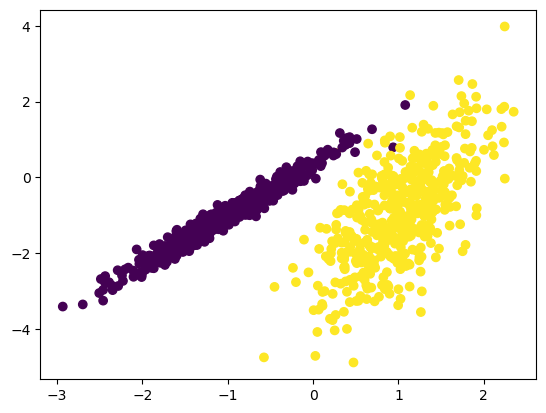

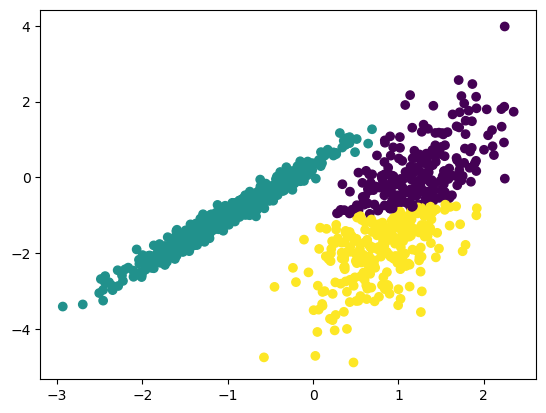

Normalized Mutual Information (NMI): 0.7719516471011815
Adjusted Rand Score: 0.7390019931927879


In [8]:
# Import necessary libraries
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset4.csv')

# Plot the dataset
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df.iloc[:, 2])
plt.show()

# Apply Expectation Maximization 
gmm = GaussianMixture(n_components=3, random_state=0).fit(df.iloc[:, :2])

# Predicting the labels for the data samples in X using trained model
labels = gmm.predict(df.iloc[:, :2])

# Ploting the clustering results
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels)
plt.show()

# Calculating and display the NMI and Rand Score metrics
print("Normalized Mutual Information (NMI):", metrics.normalized_mutual_info_score(df.iloc[:, 2], labels))
print("Adjusted Rand Score:", metrics.adjusted_rand_score(df.iloc[:, 2], labels))


Expectation Maximization works well when the clusters are roughly Gaussian and can model elliptical as well as spherical clusters. However, it may not perform well if the clusters are not well-separated or have non-Gaussian shapes.